## Zomato Restaurant EDA and Recommender System

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Dataset dimensions

In [3]:
df.shape

(9551, 21)

#### Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Null value count

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### Load Country Code dataset

In [6]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### Unique Country Code

In [7]:
sorted(df['Country Code'].unique())

[1, 14, 30, 37, 94, 148, 162, 166, 184, 189, 191, 208, 214, 215, 216]

#### Countplot for Countries

<AxesSubplot:xlabel='Country Code', ylabel='count'>

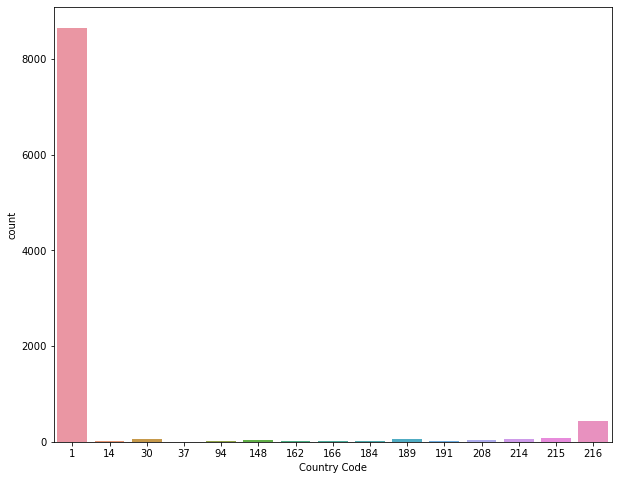

In [8]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Country Code',data=df)

1. As maximum count is of country code 1 i.e, India, and the rest are very small in number as compared to it ,so we decide to work upon only the Indian Restaurants
2. The columns - country code and currency would be irrelevant as all the rows will contain same value of them ,so, we will drop these columns

#### Fetching rows where Country is India

In [9]:
df = df[df['Country Code'] == 1].reset_index()

#### Dropping unnecessary columns

In [10]:
df = df.drop(['Restaurant ID','Address','Country Code','Currency','index'],axis = 1)
df.head()

,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Jahanpanah,Agra,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
1,Rangrezz Restaurant,Agra,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
4,Pinch Of Spice,Agra,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177


In [11]:
df.shape

(8652, 17)

#### No of unique cities

In [12]:
len(df['City'].unique())

43

#### Analysing Rating related columns

In [13]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0 : 'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

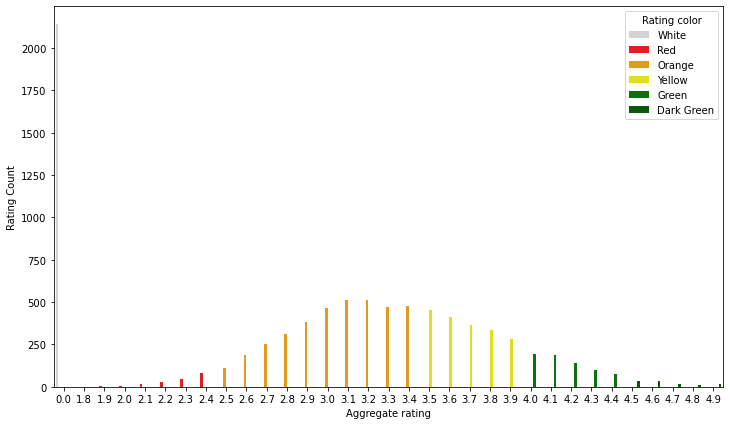

In [14]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Aggregate rating',y='Rating Count', hue = 'Rating color',data = ratings, palette= ['lightgrey','red','orange','yellow','green','darkgreen'])

#### Cities

In [15]:
df['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

1. Dataset does not contain any null values
2. Aggregate rating for most of the restaurants lies between 2.7-4.1 and also we have a large number of restaurant which are not rated and thus have rating 0
2. We have 43 unique cities and among them we will choose the top three cities and would work upon them

In [16]:
df.to_excel('preprocessed.xlsx')

#### Distribution of Cities (Top 4)

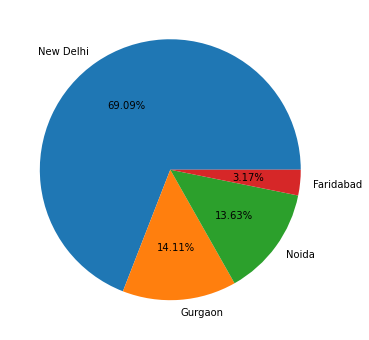

In [17]:
city_values = df.City.value_counts().values
city_labels = df.City.value_counts().index

plt.figure(figsize=(6, 6)) 
plt.pie(city_values[:4],labels=city_labels[:4],autopct='%1.2f%%')
plt.show()

Thus, the top three cities are Delhi, Gurgaon and Noida ,which cummulatively account for 96.54% of data which is a very significant number ,now we individually deal with these three cities

### 1. Delhi

In [18]:
df_Delhi = df[df['City']=='New Delhi'].reset_index()
df_Delhi = df_Delhi.drop(['City','index','Locality Verbose'], axis=1)
df_Delhi
df_Delhi.to_excel('Delhi.xlsx')

#### Unique Localities

In [19]:
locality = df_Delhi.groupby('Locality')[['Latitude', 'Longitude']].median().reset_index()
locality['Locality'].unique()

array(['ARSS Mall, Paschim Vihar', 'Aaya Nagar', 'Adchini',
       'Aditya Mega Mall, Karkardooma', 'Aerocity',
       'Aggarwal City Mall, Pitampura', 'Aggarwal City Plaza, Rohini',
       'Alaknanda', 'Ambience Mall, Vasant Kunj', 'Anand Lok',
       'Anand Vihar', 'Andaz Delhi, Aerocity',
       'Ansal Plaza Mall, Khel Gaon Marg', 'Asaf Ali Road',
       'Ashok Vihar Phase 1', 'Ashok Vihar Phase 2',
       'Ashok Vihar Phase 3', 'Barakhamba Road',
       'Basant Lok Market, Vasant Vihar', 'Bellagio, Ashok Vihar Phase 2',
       'Best Western Taurus Hotel, Mahipalpur', 'Bhikaji Cama Place',
       'Centaur Hotel, Aerocity', 'Chanakyapuri', 'Chander Nagar',
       'Chandni Chowk', 'Chawri Bazar', 'Chhatarpur', 'Chittaranjan Park',
       'City Centre Mall, Rohini', 'City Square Mall, Rajouri Garden',
       'Civil Lines', 'Community Centre, New Friends Colony',
       'Connaught Place', 'Crescent Square Mall, Rohini',
       'Cross River Mall, Karkardooma', 'Crowne Plaza Hotel, Rohini

In [20]:
locality.to_excel('newDelhi.xlsx')

#### Unique Cuisines

In [63]:
df_Delhi['Cuisines'].unique()

array(['Cuisine Varies', 'Fast Food',
       'North Indian, Seafood, Continental', 'South Indian, North Indian',
       'South Indian, North Indian, Chinese', 'Mughlai', 'South Indian',
       'Pizza', 'North Indian, Chinese', 'Chinese, North Indian',
       'Mediterranean, Italian',
       'Continental, Seafood, Goan, Andhra, Kerala, Thai', 'Parsi',
       'Finger Food', 'North Indian, Mughlai', 'Pizza, Fast Food',
       'North Indian, Chinese, Continental', 'Fast Food, Italian, Pizza',
       'North Indian, Continental, Chinese',
       'Continental, North Indian, Fast Food, Street Food, South Indian',
       'Cafe', 'Street Food, Mithai', 'Street Food, South Indian, Mithai',
       'Italian, Pizza, Fast Food', 'Bakery, Fast Food',
       'North Indian, Fast Food',
       'Mithai, North Indian, South Indian, Street Food',
       'Mithai, Street Food', 'Bakery',
       'Raw Meats, North Indian, Fast Food',
       'Chinese, North Indian, Italian, Mughlai', 'Chinese',
       'Chinese, 

### Highest rated restaurants 

In [22]:
top_5_rated = df_Delhi.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
453,Naturals Ice Cream,Connaught Place,77.222148,28.634348,Ice Cream,150,No,Yes,No,No,1,4.9,Dark Green,Excellent,2620
1041,Indian Accent - The Manor,Friends Colony,77.257106,28.570142,Modern Indian,4000,No,No,No,No,4,4.9,Dark Green,Excellent,1934
1738,Masala Library,Janpath,77.218645,28.618245,Modern Indian,5000,No,No,No,No,4,4.9,Dark Green,Excellent,408
4096,Kopper Kadai,Rajouri Garden,77.119547,28.647627,North Indian,1400,No,No,No,No,3,4.8,Dark Green,Excellent,83
452,MOB Brewpub,Connaught Place,77.222642,28.633276,"Continental, Italian, Asian, Indian",1500,No,No,No,No,3,4.7,Dark Green,Excellent,52


### Lowest rated restaurants 

In [23]:
bottom_5_rated = df_Delhi[df_Delhi['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1664,Muffins,Janakpuri,77.091798,28.627836,"Bakery, Fast Food",250,No,No,No,No,1,1.9,Red,Poor,66
4947,Subway,"The India Mall, New Friends Colony",77.268517,28.561470,"American, Fast Food, Salad, Healthy Food",500,No,Yes,No,No,2,1.9,Red,Poor,146
2637,New Baba Da Dhaba,Malviya Nagar,77.217028,28.533122,"North Indian, Mughlai, Chinese",400,No,Yes,No,No,1,2.0,Red,Poor,84
5146,Yo! China,"V3S Mall, Laxmi Nagar",77.286034,28.636704,Chinese,900,Yes,Yes,No,No,2,2.0,Red,Poor,191
4358,Wah Ji Wah,Saket,77.206467,28.524932,"North Indian, Chinese",450,No,Yes,No,No,1,2.1,Red,Poor,112


### Outlets in Delhi NCR 

In [24]:
df_Delhi[(df_Delhi['Restaurant Name'].str.contains("Domino's"))]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
16,Domino's Pizza,"Aditya Mega Mall, Karkardooma",77.301634,28.656453,"Pizza, Fast Food",700,No,No,No,No,2,2.8,Orange,Average,83
184,Domino's Pizza,Ashok Vihar Phase 3,77.177817,28.692417,"Pizza, Fast Food",700,No,No,No,No,2,3.2,Orange,Average,101
210,Domino's Pizza,"Basant Lok Market, Vasant Vihar",77.164546,28.557597,"Pizza, Fast Food",700,No,No,No,No,2,3.3,Orange,Average,90
234,Domino's Pizza,Bhikaji Cama Place,77.188949,28.569022,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,71
271,Domino's Pizza,Chander Nagar,77.277776,28.651989,"Pizza, Fast Food",700,No,No,No,No,2,3.0,Orange,Average,10
471,Domino's Pizza,Connaught Place,77.222896,28.633231,"Pizza, Fast Food",700,No,No,No,No,2,3.7,Yellow,Good,336
620,Domino's Pizza,Daryaganj,77.240214,28.644056,"Pizza, Fast Food",700,No,No,No,No,2,2.3,Red,Poor,32
635,Domino's Pizza,Defence Colony,77.233061,28.566159,"Pizza, Fast Food",700,No,No,No,No,2,2.5,Orange,Average,78
722,Domino's Pizza,Delhi University-GTB Nagar,77.205830,28.698599,"Pizza, Fast Food",700,No,No,No,No,2,2.5,Orange,Average,109
808,Domino's Pizza,Dilshad Garden,77.321958,28.676068,"Pizza, Fast Food",700,No,No,No,No,2,3.3,Orange,Average,87


### Top 30 locailities

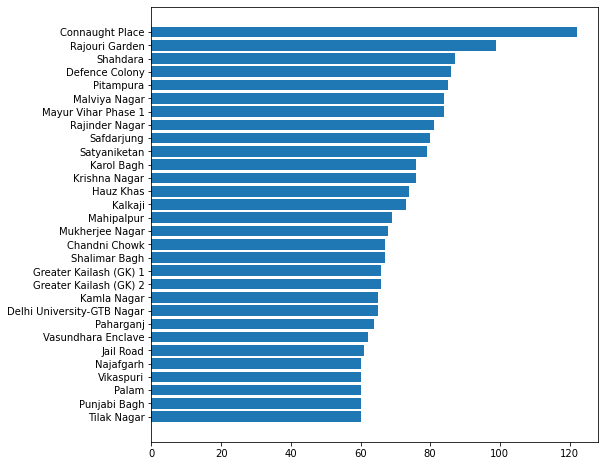

In [25]:
top_30_localities = df_Delhi['Locality'].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(8, 8))
plt.barh(top_30_localities.index,top_30_localities)
plt.gca().invert_yaxis()

### Distribution of Cuisines

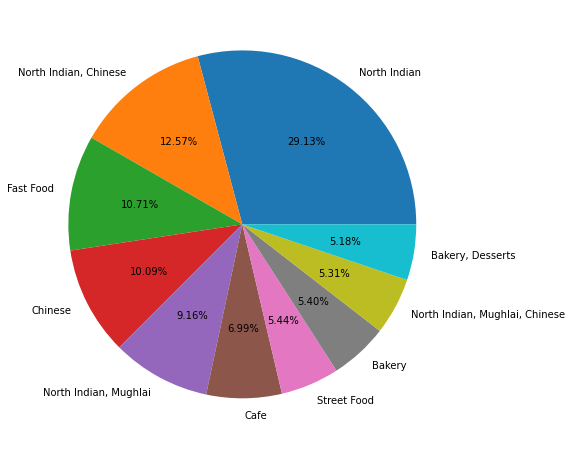

In [26]:
Cuisines_values = df_Delhi['Cuisines'].value_counts().values
Cuisines_labels = df_Delhi['Cuisines'].value_counts().index

plt.figure(figsize=(8, 8)) 
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

### Largest Restaurant Chains

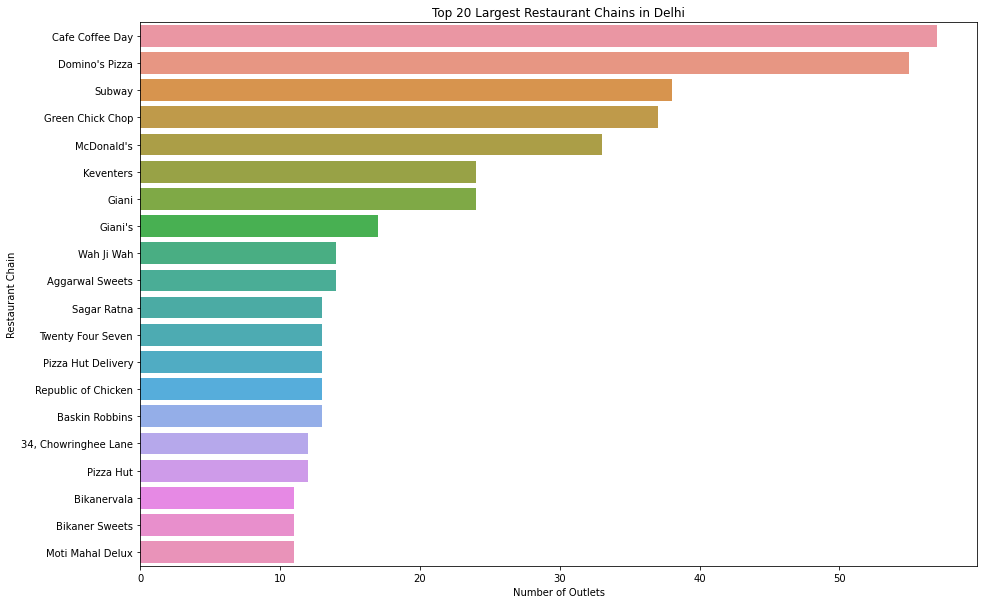

In [80]:
chains = df_Delhi['Restaurant Name'].value_counts()[:90]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top 20 Largest Restaurant Chains in Delhi")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

### Top rated Restaurant Chains

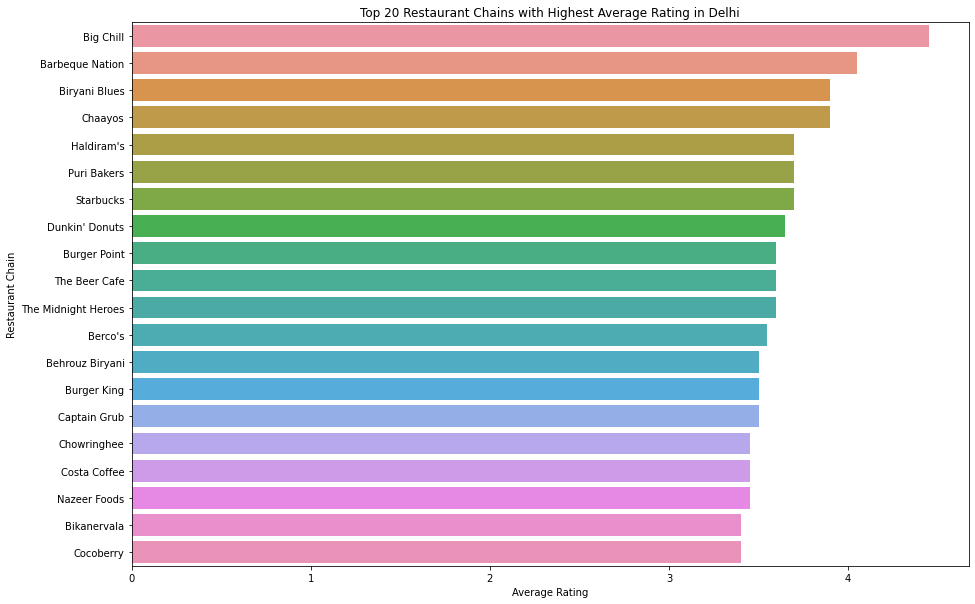

In [79]:
avg_ratings = df_Delhi[df_Delhi['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()

top_20_rated = avg_ratings.nlargest(20)

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Delhi")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations

1. Naturals Icecream, Indian Accent, Masala Library are the top rated restaurants and Muffins, Subway are least rated restaurants in Delhi
2. Connaught Place has maximum number of restaurants followed by Rajouri Garden and Shahdara
3. North Indian is the most offered cuisine follwed by Chinese and Fast Food
4. Cafe Coffee day is the largest restaurant chain with maximum number of outlets folllowed by Domino's and Subway
5. Big Chill, Barbeque Nation, Biryani Blues are the highest rated restaurant chains in Delhi

### Recommender System

In [29]:
def recommend_delhi(locality, cuisine, price1, price2):
    result = df_Delhi[
        (df_Delhi['Cuisines'].str.contains(cuisine)) &
        (df_Delhi['Locality'].str.contains(locality)) &
        (df_Delhi['Average Cost for two'].between(price1,price2))
    ][['Restaurant Name', 'Aggregate rating']]

    result = result.sort_values(by='Aggregate rating', ascending=False)
    result = result.reset_index(drop=True)
    return result

In [65]:
recommend_delhi('Kamla','North',600,800)

,Restaurant Name,Aggregate rating
0,Chill'm Bar & Cafe,4.2
1,Deez Biryani & Kebabs,3.7
2,Orange Tree Cafe,3.5
3,Shree Rathnam,3.5
4,Tikka Junction,3.4
5,Chawla's Chic Inn,3.3
6,Midnight Hunger Hub,3.3
7,Pradhan Ji Multi Cuisine Restaurant,3.3
8,Manwhar,3.2
9,Nine 75 Lounge & Bar,3.2


In [31]:
import pickle
with open('delhi.pkl', 'wb') as file:
    pickle.dump(df_Delhi, file)

### Gurgaon

In [32]:
df_Gurgaon = df[df['City']=='Gurgaon'].reset_index()
df_Gurgaon = df_Gurgaon.drop(['City','index','Locality Verbose'], axis=1)

df_Gurgaon.to_excel('Gurgaon.xlsx')

In [81]:
df_Gurgaon.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",350,No,No,No,No,1,3.4,Orange,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",800,Yes,Yes,No,No,2,2.7,Orange,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,250,No,No,No,No,1,3.0,Orange,Average,4


#### Unique Localities

In [93]:
locality = df_Gurgaon.groupby('Locality')[['Latitude', 'Longitude']].median().reset_index()
locality['Locality'].unique()

array([' ILD Trade Centre Mall, Sohna Road', 'Ambience Mall, Gurgaon',
       'Ansal Plaza Mall, Palam Vihar', 'Ardee City',
       'Best Western Skycity Hotel, Sector 15, Gurgaon',
       'Central Arcade, DLF Phase 2, Gurgaon',
       'Central Plaza Mall, Golf Course Road',
       'Country Inn & Suites By Carlson, Udyog Vihar',
       'Country Inn & Suites by Carlson, Gurgaon',
       'Country Inn & Suites by Carlson, Sector 12',
       'Country Inn & Suites, Sohna Road',
       'Courtyard by Marriott, Sushant Lok',
       'Cross Point Mall, DLF Phase 4', 'Crowne Plaza, Sector 29',
       'Cyber Greens, DLF Cyber City', 'Cyber Hub, DLF Cyber City',
       'DLF Cyber City', 'DLF Galleria, DLF Phase 4',
       'DLF Mega Mall, DLF Phase 1', 'DLF Phase 1', 'DLF Phase 2',
       'DLF Phase 3', 'DLF Phase 4', 'DLF Phase 5',
       'DLF South Point Mall, Golf Course Road',
       'DLF Star Mall, Sector 30', 'DT City Centre Mall, MG Road',
       'DT Mega Mall, DLF Phase 1', 'DoubleTree by Hi

In [35]:
locality.to_excel('gurgaon_localities.xlsx')

#### Unique Cuisines

In [95]:
df_Gurgaon['Cuisines'].unique()

array(['Cafe, Beverages', 'North Indian, Mughlai',
       'South Indian, Seafood, Kerala', 'Bakery', 'Ice Cream', 'Chinese',
       'Fast Food', 'Japanese, Thai, Chinese', 'Pizza, Desserts',
       'Raw Meats, Fast Food', 'South Indian, Chinese, Mughlai',
       'Fast Food, North Indian', 'North Indian, Chinese',
       'North Indian, South Indian, Chinese', 'Cafe', 'Raw Meats',
       'Mithai, North Indian', 'North Indian, Chinese, Fast Food',
       'North Indian', 'South Indian, Street Food',
       'North Indian, Mughlai, Seafood', 'Japanese',
       'North Indian, Chinese, Continental', 'Bakery, Fast Food',
       'Biryani', 'Pizza, Fast Food', 'Ice Cream, Desserts',
       'Italian, Pizza, Lebanese', 'Lebanese',
       'American, Fast Food, Salad, Healthy Food',
       'Chinese, Thai, North Indian, Japanese', 'North Indian, Fast Food',
       'Cafe, Tea', 'North Indian, Asian, Continental', 'Finger Food',
       'Continental, North Indian, Chinese',
       'Chinese, Italian, Nort

### Highest rated restaurants

In [83]:
top_5_rated = df_Gurgaon.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
220,Caterspoint,DLF Phase 3,77.103974,28.487264,"Mexican, American, Healthy Food",500,No,Yes,No,No,2,4.9,Dark Green,Excellent,223
677,Matchbox,Sector 29,77.062607,28.468227,"Continental, North Indian, Chinese",1500,Yes,No,No,No,3,4.8,Dark Green,Excellent,245
678,Prankster,Sector 29,77.063357,28.469166,"Modern Indian, North Indian",1500,Yes,No,No,No,3,4.8,Dark Green,Excellent,1478
676,feel ALIVE,Sector 29,77.064137,28.467926,"North Indian, American, Asian, Biryani",1200,Yes,No,No,No,3,4.7,Dark Green,Excellent,69
303,Manhattan Brewery & Bar Exchange,"Global Foyer Mall, Golf Course Road",77.095027,28.460271,"Finger Food, American, Continental, North Indi...",2000,No,No,No,No,4,4.6,Dark Green,Excellent,2093


### Lowest rated restaurants

In [84]:
bottom_5_rated = df_Gurgaon[df_Gurgaon['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
234,Aahar,DLF Phase 3,77.094326,28.492384,"North Indian, South Indian, Chinese",400,No,Yes,No,No,1,2.0,Red,Poor,60
235,Chicken Bytes,DLF Phase 3,77.094263,28.492337,"North Indian, Mughlai, Chinese",500,No,Yes,No,No,2,2.1,Red,Poor,34
422,Suburbia - The Empire,"MGF Metropolitan Mall, MG Road",77.080235,28.481128,"Continental, European, North Indian",1800,Yes,No,No,No,3,2.1,Red,Poor,90
468,Pizza Hut Delivery,"Omaxe Celebration Mall, Sohna Road, Gurgaon",77.043268,28.410956,"Italian, Pizza, Fast Food",800,No,Yes,No,No,2,2.2,Red,Poor,93
1116,Wah Ji Wah,"Vyapar Kendra, Sushant Lok",77.083226,28.460573,North Indian,400,No,Yes,No,No,1,2.2,Red,Poor,142


### Outlets in Gurgaon

In [85]:
df_Gurgaon[(df_Gurgaon['Restaurant Name'].str.contains("Domino's"))]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
31,Domino's Pizza,"Central Plaza Mall, Golf Course Road",77.101007,28.442867,"Pizza, Fast Food",700,No,No,No,No,2,3.4,Orange,Average,104
102,Domino's Pizza,DLF Cyber City,77.089048,28.494525,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,125
123,Domino's Pizza,"DLF Mega Mall, DLF Phase 1",77.093083,28.475776,"Pizza, Fast Food",700,No,No,No,No,2,2.8,Orange,Average,30
470,Domino's Pizza,Omaxe Gurgaon Mall,77.043178,28.411395,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,112
541,Domino's Pizza,"Qutab Plaza, DLF Phase 1",77.102445,28.471966,"Pizza, Fast Food",700,No,No,No,No,2,2.8,Orange,Average,70
643,Domino's Pizza,Sector 21,77.071421,28.509770,"Pizza, Fast Food",700,No,No,No,No,2,3.3,Orange,Average,32
683,Domino's Pizza,Sector 29,77.063219,28.468225,"Pizza, Fast Food",700,No,No,No,No,2,3.6,Yellow,Good,146
923,Domino's Pizza,Sohna Road,77.039310,28.424831,"Pizza, Fast Food",700,No,No,No,No,2,2.3,Red,Poor,70
1048,Domino's Pizza,Udyog Vihar,77.067069,28.489985,"Pizza, Fast Food",700,No,No,No,No,2,0.0,White,Not rated,3


### Top 30 Localities

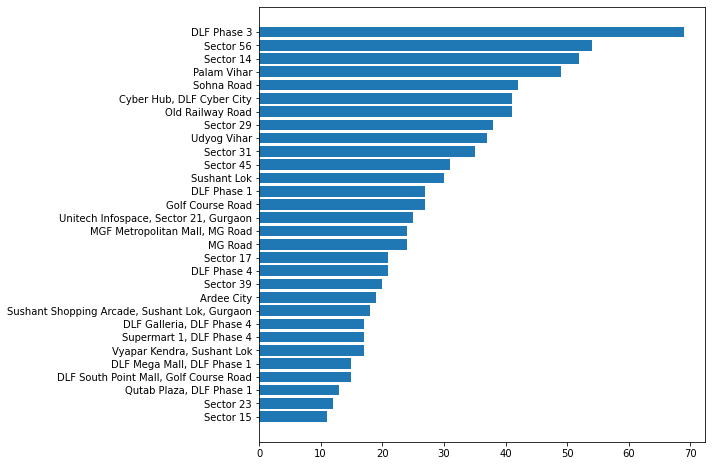

In [86]:
top_30_localities = df_Gurgaon['Locality'].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(8, 8))
plt.barh(top_30_localities.index,top_30_localities)
plt.gca().invert_yaxis()

### Distribution of Cuisines

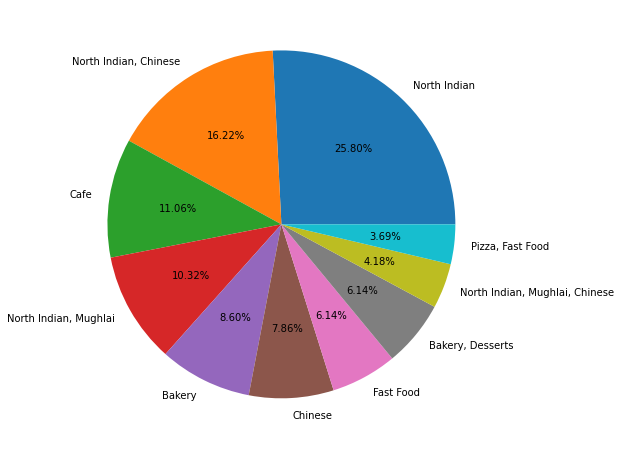

In [87]:
Cuisines_values = df_Gurgaon['Cuisines'].value_counts().values
Cuisines_labels = df_Gurgaon['Cuisines'].value_counts().index

plt.figure(figsize=(8, 8)) 
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

### Largest Restaurant Chains in Gurgaon

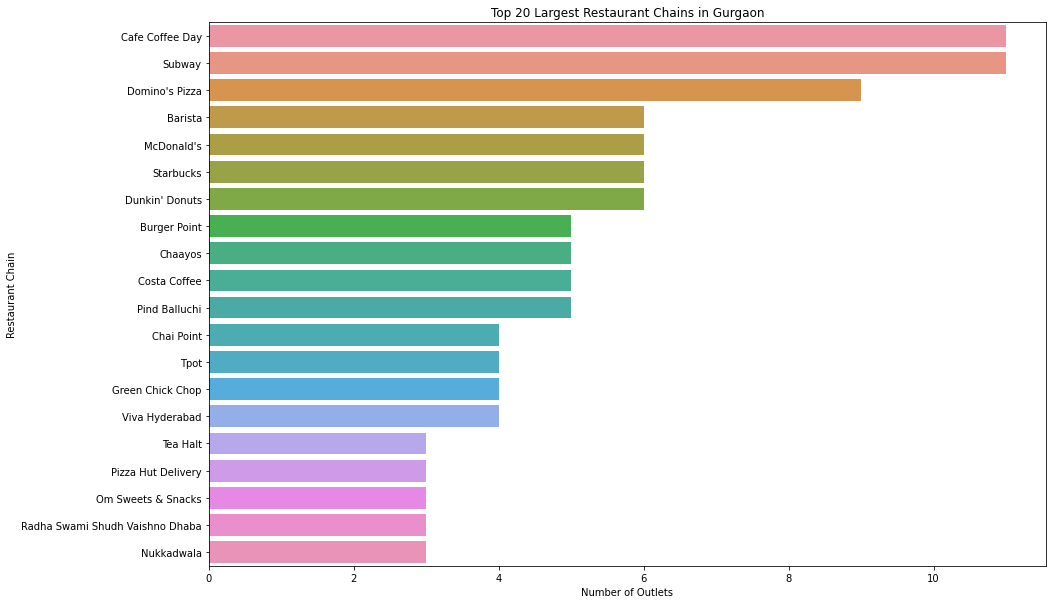

In [144]:
chains = df_Gurgaon['Restaurant Name'].value_counts()[:90]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top 20 Largest Restaurant Chains in Gurgaon")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

### Top rated Restaurant Chains

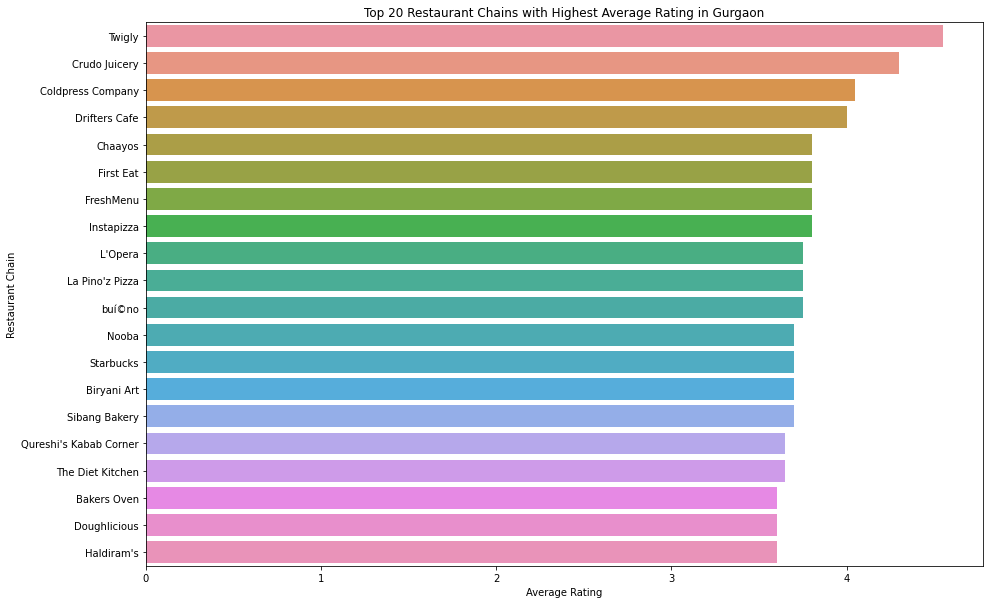

In [97]:
avg_ratings = df_Gurgaon[df_Gurgaon['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()

top_20_rated = avg_ratings.nlargest(20)

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Gurgaon")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations

1. Caterspoint is top rated restaurant and Aahar is the least rated restaurant in Gurgaon
2. DLF phase 3 has maximum number of restaurants followed by Sector 56 and Sector 14
3. North Indian is the most offered cuisine followed by Fast Food, Mughlai and Chinese
4. Cafe Coffee Day is the largest restaurant chain in Gurgaon with maximum number of outlets
5. Twigly is highest rated restaurant chain in Gurgaon

### Recommender System

In [90]:
def recommend_gurgaon(locality, cuisine,price1, price2):
    result = df_Gurgaon[
     (df_Gurgaon['Cuisines'].str.contains(cuisine)) &
     (df_Gurgaon['Locality'].str.contains(locality)) &
     (df_Gurgaon['Average Cost for two'].between(price1, price2))
     ][['Restaurant Name', 'Aggregate rating']]

    result = result.sort_values(by='Aggregate rating', ascending=False)
    result.reset_index(drop=True, inplace=True)
    return result

In [98]:
recommend_gurgaon('DLF Phase 3','North',300,900)

,Restaurant Name,Aggregate rating
0,First Eat,4.0
1,Crazy Bhukkhad,3.9
2,Veg Ex,3.8
3,Deez Biryani & Kebabs,3.7
4,Fomads,3.6
5,ZASTY,3.5
6,Mom's Kitchen,3.5
7,Happy Beings,3.5
8,Surprise O Meal,3.4
9,Dabba Meat,3.4


In [46]:
import pickle
with open('gurgaon.pkl', 'wb') as file:
    pickle.dump(df_Gurgaon, file)

### Noida

In [47]:
df_Noida = df[df['City']=='Noida'].reset_index()
df_Noida = df_Noida.drop(['City','index','Locality Verbose'], axis=1)

df_Noida.to_excel('Noida.xlsx')

In [99]:
df_Noida.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Ali Baba Caves,"Ansal Plaza Mall, Greater Noida",77.528129,28.458107,"Cafe, Chinese",500,No,No,No,No,2,3.1,Orange,Average,15
1,Cafí© Doo Ghoont,"Ansal Plaza Mall, Greater Noida",77.507456,28.463957,Cafe,600,No,Yes,No,No,2,3.4,Orange,Average,50
2,Knights Chaska,"Ansal Plaza Mall, Greater Noida",77.507834,28.464434,"North Indian, Chinese",800,Yes,No,No,No,2,2.9,Orange,Average,6
3,Thirsty Scholar Cafe,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,Cafe,450,No,No,No,No,1,3.2,Orange,Average,45
4,Savoury Street,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,"North Indian, Continental, Italian",600,No,No,No,No,2,0.0,White,Not rated,3


#### Unique Localities

In [49]:
locality = df_Noida.groupby('Locality')[['Latitude', 'Longitude']].median().reset_index()
locality['Locality'].unique()

array(['Ansal Plaza Mall, Greater Noida', 'Brahmaputra Shopping Complex',
       'Centre Stage Mall, Sector 18',
       'DLF Mall of India, Sector 18,  Noida',
       'Fortune Inn Grazia, Sector 27, Noida',
       'Ganga Shopping Complex, Sector 29',
       'Gardens Galleria, Sector 38 Noida', 'Golf Course',
       'Greater Noida', 'Harsha Mall, Greater Noida',
       'Hotel Golf View, Sector 37, Noida',
       'Jaipuria Plaza, Sector 26, Noida',
       'Jaypee Greens Golf & Spa Resort, Surajpur',
       'Jaypee Greens, Greater Noida, Noida',
       'Logix City Centre, Sector 32, Noida',
       'Logix Cyber Park, Sector 62, Noida', 'MSX Mall, Greater Noida',
       'Mosaic Hotels, Sector 18, Noida ',
       'Park Ascent, Sector 62, Noida',
       'Park Plaza Hotel, Sector 55, Noida',
       'Radisson Blu, Sector 18, Noida', 'Sector 1', 'Sector 10',
       'Sector 11', 'Sector 110', 'Sector 12', 'Sector 125', 'Sector 127',
       'Sector 132', 'Sector 15', 'Sector 16', 'Sector 18', 'Sec

In [50]:
locality.to_excel('noida_localities.xlsx')

#### Unique Cuisines

In [101]:
df_Noida['Cuisines'].unique()

array(['Cafe, Chinese', 'Cafe', 'North Indian, Chinese',
       'North Indian, Continental, Italian',
       'North Indian, Chinese, Fast Food, Street Food', 'Bakery',
       'South Indian', 'Asian, Continental, Italian, North Indian',
       'North Indian, South Indian, Chinese, Street Food, Fast Food, Mithai, Desserts',
       'Italian, Lebanese, North Indian',
       'American, Tex-Mex, Italian, Mexican, North Indian',
       'North Indian, Mughlai',
       'North Indian, European, Asian, Mediterranean', 'Tibetan, Chinese',
       'Desserts', 'Bakery, Desserts', 'Chinese, Thai, Sushi',
       'Burger, American, Fast Food', 'Cafe, Tea',
       'Chinese, Thai, Asian, Japanese, Korean, Seafood',
       'Burger, Desserts, Fast Food', 'Pizza, Fast Food', 'Beverages',
       'North Indian, Continental, Mughlai, Asian',
       'Italian, Pizza, Fast Food', 'Italian, Pizza', 'Fast Food',
       'Mexican, Fast Food', 'Ice Cream, Desserts', 'Burger, Fast Food',
       'Lebanese, Mediterranean,

### Highest rated restaurants

In [52]:
top_5_rated = df_Noida.sort_values(by='Aggregate rating', ascending=False).head(5)
top_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
17,The Big Chill Cakery,"DLF Mall of India, Sector 18, Noida",77.321880,28.567727,"Bakery, Desserts",700,No,No,No,No,2,4.5,Dark Green,Excellent,147
16,Oh So Stoned!,"DLF Mall of India, Sector 18, Noida",77.321039,28.568005,Desserts,250,No,No,No,No,1,4.5,Dark Green,Excellent,324
39,Mamagoto,"DLF Mall of India, Sector 18, Noida",77.320475,28.566485,"Asian, Thai, Chinese",1600,Yes,Yes,No,No,3,4.3,Green,Very Good,428
569,Desi Swag,Sector 37,77.340025,28.565312,"North Indian, Mughlai",500,No,Yes,No,No,2,4.3,Green,Very Good,96
568,Bistro 37,Sector 37,77.339741,28.565295,"Fast Food, Chinese",400,No,No,No,No,1,4.3,Green,Very Good,1005


### Lowest rated restaurants

In [53]:
bottom_5_rated = df_Noida[df_Noida['Rating text'] != 'Not rated'].sort_values(by='Aggregate rating', ascending=True).head(5)
bottom_5_rated

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1073,Moti Mahal Delux Tandoori Trail,"The Great India Place, Sector 38",77.325445,28.567040,"North Indian, Mughlai",1200,Yes,Yes,No,No,3,2.0,Red,Poor,108
1072,Club Ice Cube,"The Great India Place, Sector 38",77.326475,28.568067,"North Indian, Continental, Chinese",2400,Yes,No,No,No,4,2.0,Red,Poor,230
1071,Chopaal,"The Great India Place, Sector 38",77.325308,28.567150,"Chinese, North Indian, South Indian, Fast Food",450,No,No,No,No,1,2.0,Red,Poor,161
499,Wah Ji Wah,Sector 27,77.328098,28.574339,North Indian,500,No,Yes,No,No,2,2.0,Red,Poor,74
979,Chawla's 2,Sector 72,77.373336,28.515425,"North Indian, Mughlai, Chinese",1400,No,Yes,No,No,3,2.1,Red,Poor,22


### Outlets in Noida

In [54]:
df_Noida[(df_Noida['Restaurant Name'].str.contains("Domino's"))]

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
90,Domino's Pizza,Greater Noida,77.527913,28.458345,"Pizza, Fast Food",700,No,No,No,No,2,3.5,Yellow,Good,56
242,Domino's Pizza,Sector 110,77.387581,28.534208,"Pizza, Fast Food",700,No,No,No,No,2,2.1,Red,Poor,84
284,Domino's Pizza,Sector 132,77.377632,28.514191,"Pizza, Fast Food",700,No,No,No,No,2,2.5,Orange,Average,27
404,Domino's Pizza,Sector 18,77.324888,28.570282,"Pizza, Fast Food",700,No,No,No,No,2,3.6,Yellow,Good,547
582,Domino's Pizza,Sector 38,77.334211,28.564222,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,70
682,Domino's Pizza,Sector 48,77.372983,28.555554,"Pizza, Fast Food",700,No,No,No,No,2,2.3,Red,Poor,38
716,Domino's Pizza,Sector 50,77.362104,28.569979,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,161
828,Domino's Pizza,Sector 62,77.370433,28.624431,"Pizza, Fast Food",700,No,No,No,No,2,2.6,Orange,Average,118
954,Domino's Pizza,Sector 72,77.398650,28.588001,"Pizza, Fast Food",700,No,No,No,No,2,0.0,White,Not rated,2
1035,Domino's Pizza,"Supertech Shopprix Mall, Sector 61",77.364908,28.597114,"Pizza, Fast Food",700,No,No,No,No,2,2.4,Red,Poor,98


### Top 30 Localities

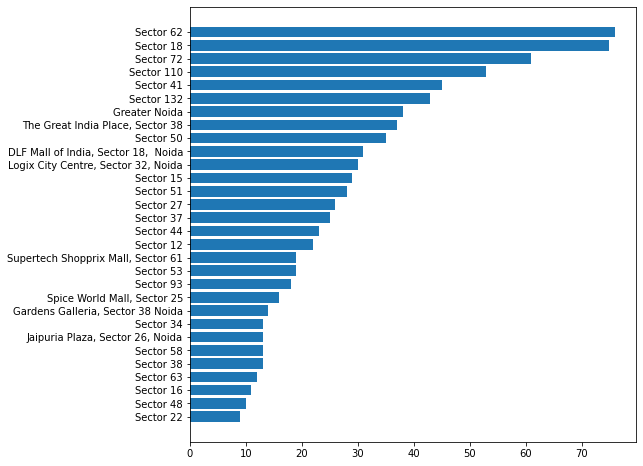

In [55]:
top_30_localities = df_Noida['Locality'].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(8, 8))
plt.barh(top_30_localities.index,top_30_localities)
plt.gca().invert_yaxis()

### Distribution of Cuisines

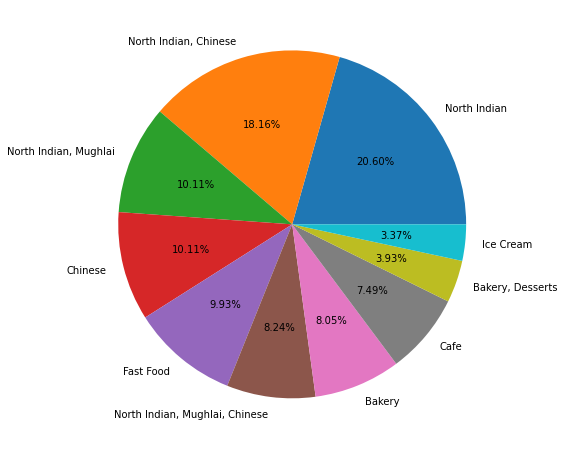

In [56]:
Cuisines_values = df_Noida['Cuisines'].value_counts().values
Cuisines_labels = df_Noida['Cuisines'].value_counts().index

plt.figure(figsize=(8, 8)) 
plt.pie(Cuisines_values[:10],labels=Cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

### Largest Restaurant Chains in Noida

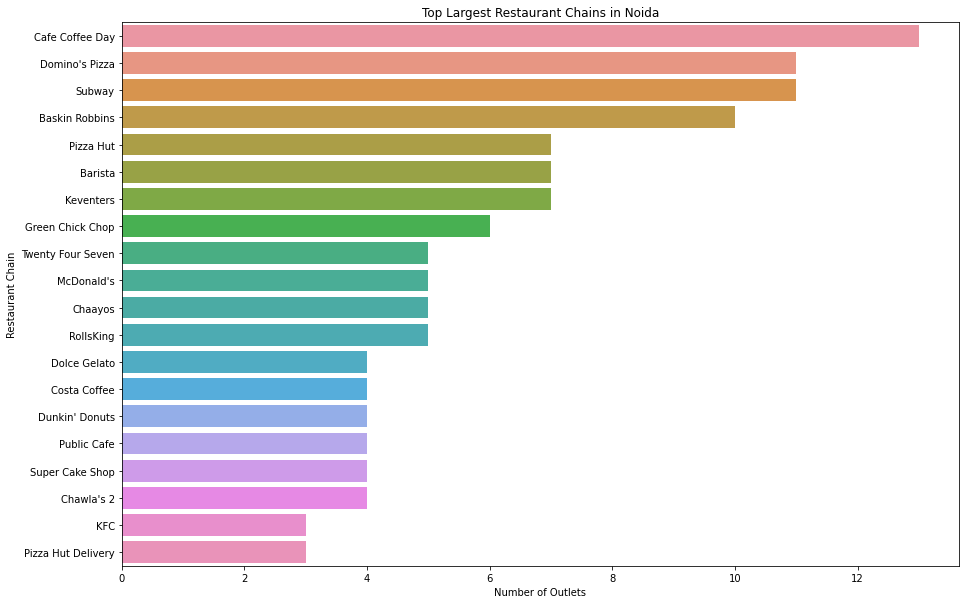

In [146]:
chains = df_Noida['Restaurant Name'].value_counts()[:25]
top_20_chains = chains[:20]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_chains, y=top_20_chains.index)
plt.title("Top Largest Restaurant Chains in Noida")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.show()

### Top rated Restaurant Chains

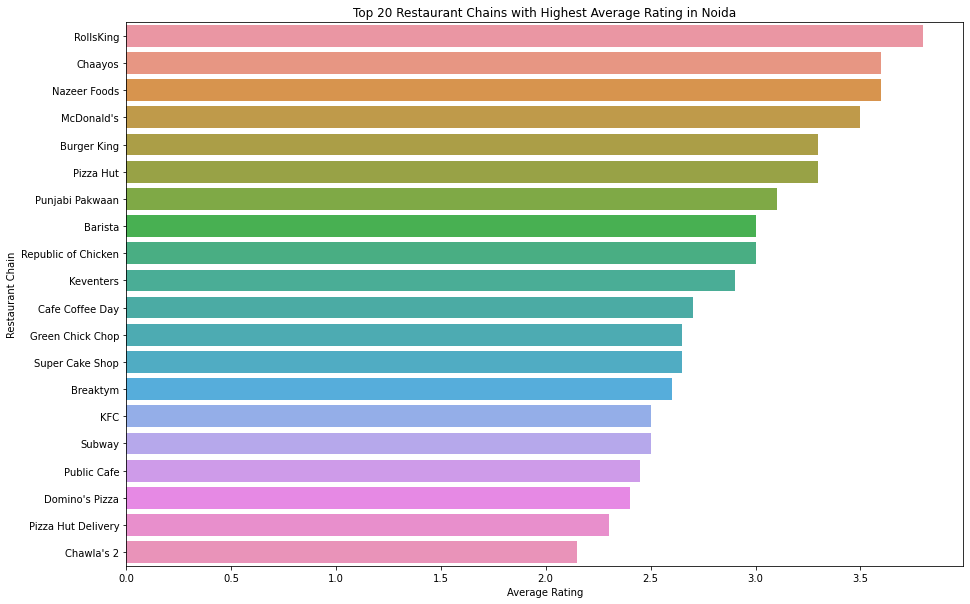

In [148]:
avg_ratings = df_Noida[df_Noida['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name')['Aggregate rating'].median()

top_20_rated = avg_ratings.nlargest(20)

plt.figure(figsize=(15, 10))
sns.barplot(x=top_20_rated, y=top_20_rated.index)
plt.title("Top 20 Restaurant Chains with Highest Average Rating in Noida")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

#### Observations

1. The Big Chill Cakery is the top rated restaurant and Moti Mahal Delux is the least rated restaurant in Noida
2. Sector 62 has maximum number of restaurants followed by Sector 18 and Sector 72
3. North Indian is the most offered cuisine followed by Mughlai and Chinese
4. Cafe Coffee day is the largest restaurant chain in Noida with maximum number of outlets
5. RollsKing is highest rated restaurant chain in Noida

### Recommender System

In [59]:
def recommend_noida(locality, cuisine,price1, price2):
    result = df_Noida[
     (df_Noida['Cuisines'].str.contains(cuisine)) &
     (df_Noida['Locality'].str.contains(locality)) &
     (df_Noida['Average Cost for two'].between(price1, price2))
     ][['Restaurant Name', 'Aggregate rating']]

    result = result.sort_values(by='Aggregate rating', ascending=False)
    result.reset_index(drop=True, inplace=True)
    return result

In [149]:
recommend_noida('Sector 62','North',300,800)

,Restaurant Name,Aggregate rating
0,Rollmaal,3.4
1,World Bites,3.4
2,Malabar Junction,3.3
3,Rasoi99,3.2
4,Food Brigade,3.2
5,Cafe Green Apple,3.2
6,MS Foods,3.1
7,The Hunger Cure,3.0
8,Boxmeal,3.0
9,Pichli Gali,3.0


In [61]:
import pickle
with open('noida.pkl', 'wb') as file:
    pickle.dump(df_Noida, file)